Hal pertama adalah melakukan import data pada kaggle dan mengimport beberapa
modul yang nantinya akan dibutuhkan untuk memproses data. pada hal ini kami menggunakan modul pandas, numpy.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

uploaded = files.upload()

Saving Student_Performance.csv to Student_Performance.csv


Langkah berikutnya adalah pembuatan dataframe menggunakan modul pandas yang
dimana dataframe ini akan terisi oleh data dari dataset yang telah didapatkan.

In [ ]:
data = pd.read_csv('Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Setelah terisi dengan data yang ada pada dataset. Langkah selanjutnya
adalah merubah nama setiap kolom agar lebih mudah untuk dioperasikan.

In [ ]:
# Merubah nama kolom untuk mempermudah pengoperasian

data.columns = ['Jam Belajar', 'Nilai', 'Kegiatan Extrakurikuler', 'Jam Tidur', 'Jumlah Latihan Soal', 'Performa']
data.head()

,Jam Belajar,Nilai,Kegiatan Extrakurikuler,Jam Tidur,Jumlah Latihan Soal,Performa
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Setelah berhasil melakukan perubahan nama kolom, berikutnya adalah melakukan cek
data yang bernilai null atau melakukan pengecekan missing values pada setiap kolom
yang ada pada dataframe. Untuk melakukan hal tersebut kami menggunakan function
isnull() dari python.

In [ ]:
data.isnull().sum()

Jam Belajar                0
Nilai                      0
Kegiatan Extrakurikuler    0
Jam Tidur                  0
Jumlah Latihan Soal        0
Performa                   0
dtype: int64

Dapat dilihat diatas bahwa tidak terdapat missing values pada semua kolom yang ada pada
dataframe sehingga kami tidak perlu mengatasi missing values. Kemeudian langkah selanjutnya adalah mengganti data string menjadi data numeric.
Pada hal ini kami merubah value data dari kolom "Kegiatan Extrakurikuler" yaitu dari value "Yes"
menjadi 1 dan "No" menjadi 0.


In [ ]:
# mengubah data String menjadi int untuk memudahkan proses manipulasi data

data['Kegiatan Extrakurikuler'] = data['Kegiatan Extrakurikuler'].map({'Yes': 1, 'No': 0})
data.head()

,Jam Belajar,Nilai,Kegiatan Extrakurikuler,Jam Tidur,Jumlah Latihan Soal,Performa
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


Karena kami disini melakukan analisis regresi, dimana tujuannya untuk mencari pengaruh dari fitur-fitur yang ada terhadap target yaitu "Performa". Maka setelah melakukan pemilihan fitur, didapatkan bahwa semua fitur cukup berpengaruh terhadap target sehingga, tidak ada fitur yang dihapus.

In [ ]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.

data.corr().style.background_gradient().set_precision(2)

<ipython-input-6-b08867b5ba18>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient().set_precision(2)


,Jam Belajar,Nilai,Kegiatan Extrakurikuler,Jam Tidur,Jumlah Latihan Soal,Performa
Jam Belajar,1.00,-0.01,0.00,0.00,0.02,0.37
Nilai,-0.01,1.00,0.01,0.01,0.01,0.92
Kegiatan Extrakurikuler,0.00,0.01,1.00,-0.02,0.01,0.02
Jam Tidur,0.00,0.01,-0.02,1.00,0.00,0.05
Jumlah Latihan Soal,0.02,0.01,0.01,0.00,1.00,0.04
Performa,0.37,0.92,0.02,0.05,0.04,1.00


Selanjutnya adalah melakukan visualisasi distribusi dari setiap kolom atau fitur yang ada
pada tabel untuk melakukan analisis pada data. Pada hal ini kami menggunakan modul
pyplot dan seaborn untuk melakukan visualisasi data.

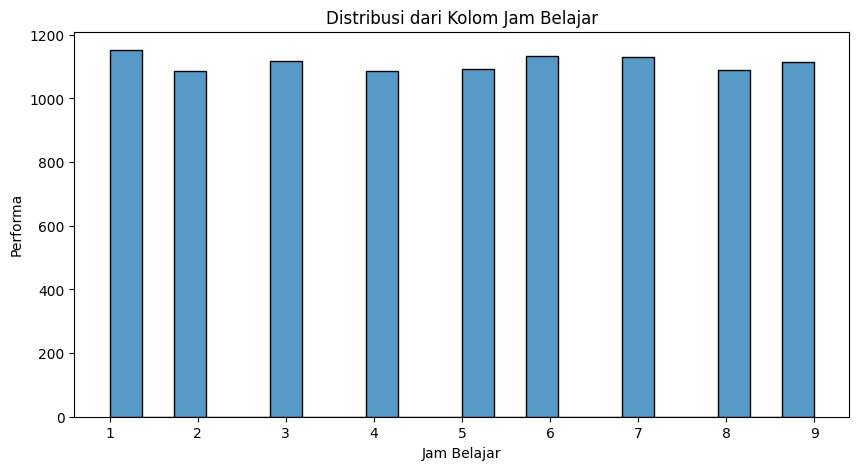

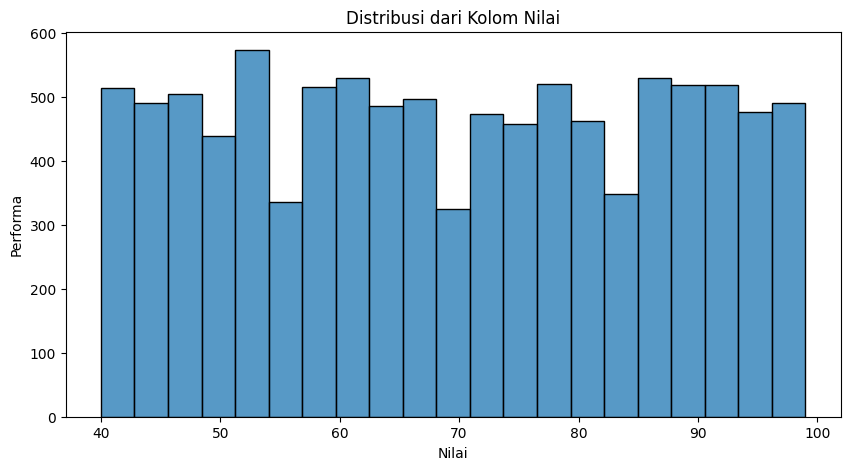

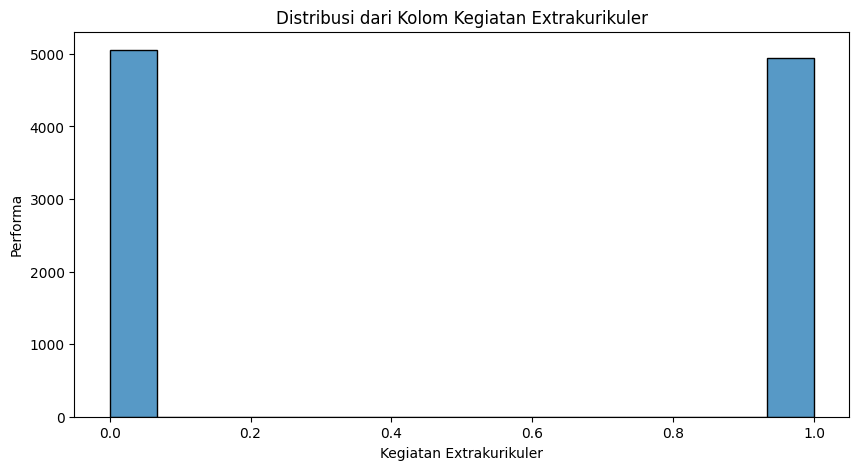

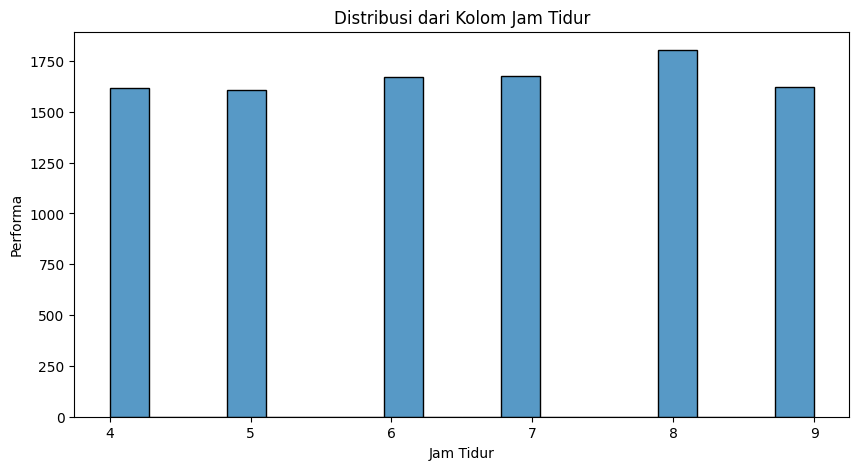

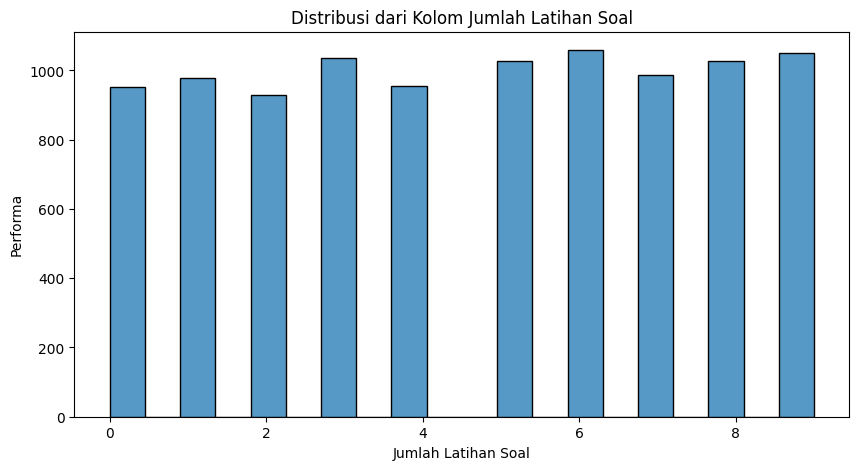

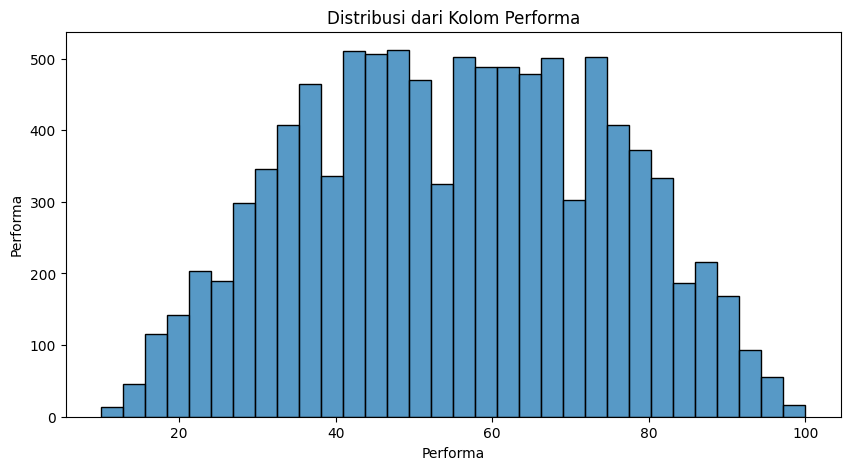

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in data.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column])
    plt.title(f"Distribusi dari Kolom {column}")
    plt.xlabel(column)
    plt.ylabel("Performa")
    plt.show()


Selain melakukan visualisasi pada distribusi setiap fitur, kami juga melakukan visualisasi
hubungan dari setiap fitur seperti Performa dan Jam belajar, Performa dan Nilai, serta Jam belajar  dan
Nilai.

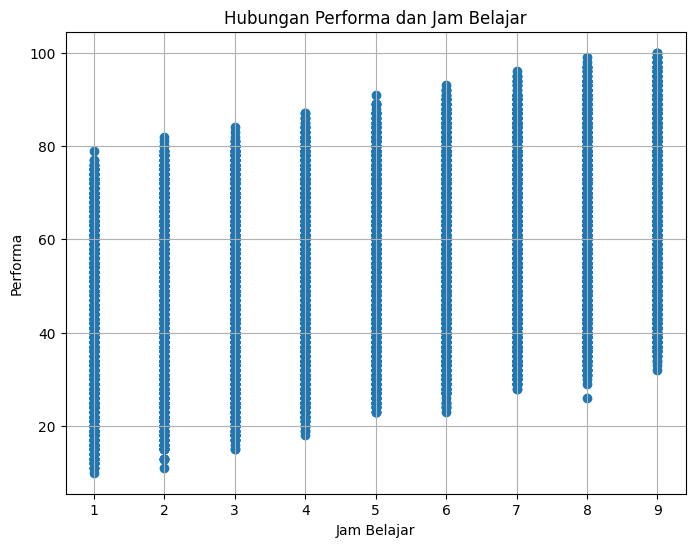

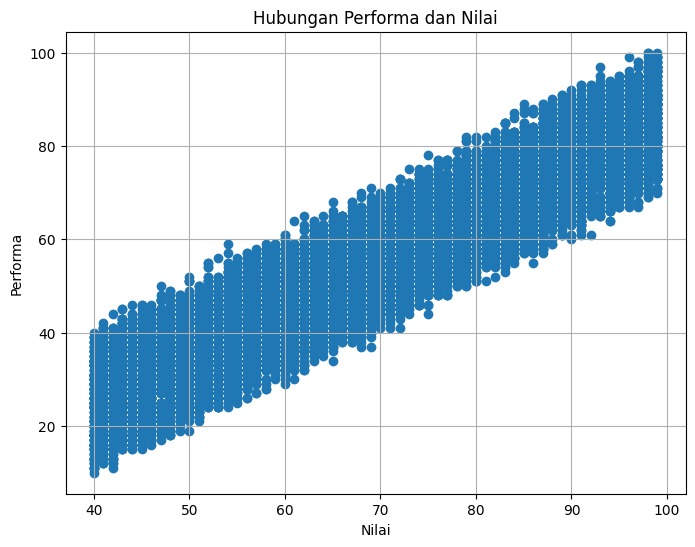

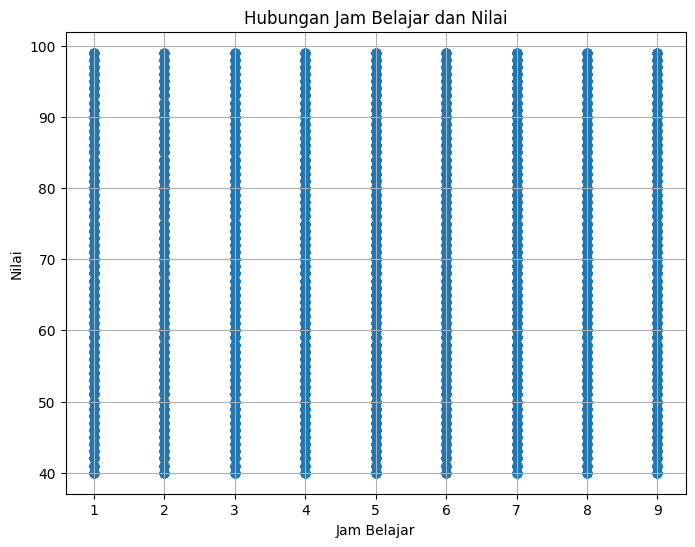

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hubungan antara Performa dan Jam Belajar
plt.figure(figsize=(8, 6))
plt.scatter(data['Jam Belajar'], data['Performa'])
plt.title('Hubungan Performa dan Jam Belajar')
plt.xlabel('Jam Belajar')
plt.ylabel('Performa')
plt.grid(True)
plt.show()

# Visualisasi hubungan antara Performa dan Nilai
plt.figure(figsize=(8, 6))
plt.scatter(data['Nilai'], data['Performa'])
plt.title('Hubungan Performa dan Nilai')
plt.xlabel('Nilai')
plt.ylabel('Performa')
plt.grid(True)
plt.show()

# Visualisasi hubungan antara Jam Belajar dan Nilai
plt.figure(figsize=(8, 6))
plt.scatter(data['Jam Belajar'], data['Nilai'])
plt.title('Hubungan Jam Belajar dan Nilai')
plt.xlabel('Jam Belajar')
plt.ylabel('Nilai')
plt.grid(True)
plt.show()


Hasil dari visusalisasi antara dua kolom kami mendapatkan bahwa semakin tinggi jam belajar dan nilai seorang siswa, maka performanya semakin baik.

Setelah data melalui tahapan pre-processing dan analisis menggunakan visualisasi,
langkah berikutnya adalah proses modeling untuk menetukan seberapa baik model multiple linear regresi untuk memprediksi performa atau kinerja siswa berdasarkan fitur-fitur yang diberikan seperti "Jam Belajar", "Nilai", "Kegiatan Extrakurikuler", "Jam Tidur", dan "Jumlah Latihan Soal". Dalam hal ini, Kami menggunakan metrik seperti R2 Score, Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error untuk menilai seberapa baik model dapat menggeneralisasi pada data baru.

Agar pengujian dapat lebih optimal kami membagi dataset menjadi 80% data latih, dan 20% data uji

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Memisahkan fitur dan target
X_features = data.drop(columns=['Performa'])
y_target = data['Performa']

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model dengan berbagai metrik
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Menampilkan hasil evaluasi
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


R2 Score: 0.9889832909573145
Mean Absolute Error: 1.6111213463123044
Mean Squared Error: 4.082628398521853
Root Mean Squared Error: 2.0205515085050054


Hasil evaluasi model multiple linear regression menunjukkan kinerja model yang sangat baik terhadap data uji. R2 Score yang mendekati 1, yakni sebesar 0.989, mengindikasikan bahwa sekitar 98.9% dari variasi dalam "Performa" dapat dijelaskan oleh fitur-fitur yang digunakan dalam model. Ini merupakan indikasi yang sangat baik bahwa model telah berhasil dalam menangkap pola-pola yang ada di dalam data.

Sementara itu, nilai Mean Absolute Error (MAE) sebesar 1.611 menunjukkan rata-rata kesalahan absolut antara prediksi dan nilai sebenarnya. Dengan kata lain, rata-rata perbedaan antara nilai yang diprediksi oleh model dan nilai sebenarnya adalah sekitar 1.611.

Nilai Mean Squared Error (MSE) yang sebesar 4.083 dan Root Mean Squared Error (RMSE) sebesar 2.021 juga memberikan gambaran tentang seberapa jauh prediksi model dari nilai sebenarnya dalam skala kuadrat dan akar kuadratnya. RMSE yang rendah menunjukkan bahwa model cenderung memiliki kesalahan prediksi yang kecil dalam memperkirakan "Performa".

Secara keseluruhan, hasil evaluasi ini menunjukkan bahwa model multiple linear regression yang digunakan memiliki kemampuan yang sangat baik dalam memprediksi "Performance Index" berdasarkan fitur-fitur yang diberikan. Kinerja yang tinggi ini dapat memberikan kepercayaan bahwa model dapat diandalkan dalam memprediksi kinerja dengan akurasi yang tinggi pada data baru yang belum pernah dilihat sebelumnya.

In [ ]:
# Melakukan prediksi pada data uji
predict = np.round(model.predict(X_test), decimals=1)

# Membuat DataFrame untuk membandingkan nilai sebenarnya dengan nilai prediksi
comparison_df = pd.DataFrame({"Actual Performance": y_test, "Predicted Performance": predict})
print(comparison_df)

      Actual Performance  Predicted Performance
6252                51.0                   54.7
4684                20.0                   22.6
1731                46.0                   47.9
4742                28.0                   31.3
4521                41.0                   43.0
...                  ...                    ...
6412                45.0                   46.9
8285                66.0                   62.7
7853                16.0                   16.8
1095                65.0                   63.3
6929                47.0                   45.9

[2000 rows x 2 columns]


Bukti kualitas model terdapat dalam perbedaan yang minimal antara nilai aktual dari dataset (Actual Performance) dengan nilai yang diprediksi oleh model (Predicted Performance). Hal ini menunjukkan tingkat akurasi yang tinggi, di mana model kami mampu memprediksi nilai target dengan sangat mendekati nilai asli dari data uji. Semakin kecil perbedaan antara nilai yang diprediksi dan nilai aktual, semakin baik model dalam memahami dan menggambarkan pola yang ada dalam data. Dengan adanya perbedaan yang sangat tipis, dapat disimpulkan bahwa model multiple linear regression yang kami gunakan mampu memperkirakan nilai "Performance Index" dengan presisi yang tinggi berdasarkan fitur-fitur yang diberikan.

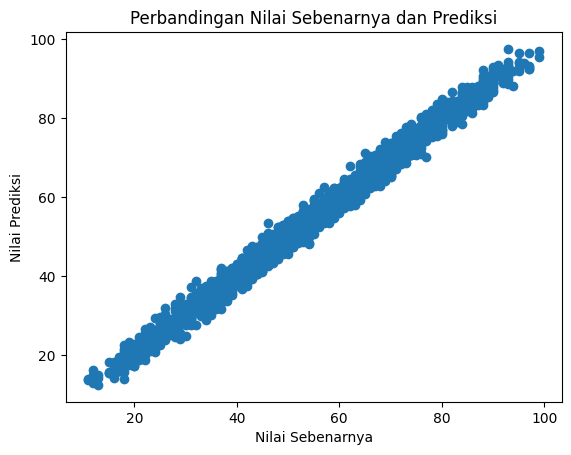

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Sebenarnya dan Prediksi')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Memisahkan fitur dan target
X_features = data.drop(columns=['Performa'])
y_target = data['Performa']

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat data uji baru (di luar dataset)
new_data = pd.DataFrame({
    'Jam Belajar': [0, 7, 10],
    'Nilai': [0, 75, 100],
    'Kegiatan Extrakurikuler': [0, 1, 0],
    'Jam Tidur': [10, 10, 8],
    'Jumlah Latihan Soal': [0, 20, 100]
})

# Melakukan prediksi pada data uji yang baru
new_predictions = model.predict(new_data)

# Menambahkan kolom hasil prediksi pada data uji yang baru ke DataFrame
# new_data['Predicted Performance'] = np.round(new_predictions, decimals=1)
# print(new_data)

new_data['Predicted Performance'] = np.clip(new_predictions, 0, 100)
print(new_data)


   Jam Belajar  Nilai  Kegiatan Extrakurikuler  Jam Tidur  \
0            0      0                        0         10   
1            7     75                        1         10   
2           10    100                        0          8   

   Jumlah Latihan Soal  Predicted Performance  
0                    0               0.000000  
1                   20              71.534217  
2                  100             100.000000  


jam belajar dan jam tidur perhari

In [ ]:
# Membandingkan nilai performa di dataset dengan nilai performa yang diprediksi untuk data uji baru
comparison_with_dataset = pd.DataFrame({
    'Actual Performance': data['Performa'],
    'Predicted Performance': model.predict(X_features)
})

print("Data performa dari dataset:")
print(data['Performa'])

print("\nPerbandingan nilai performa di dataset dengan nilai performa yang diprediksi untuk data uji baru:")
print(comparison_with_dataset)

Data performa dari dataset:
0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performa, Length: 10000, dtype: float64

Perbandingan nilai performa di dataset dengan nilai performa yang diprediksi untuk data uji baru:
      Actual Performance  Predicted Performance
0                   91.0              91.820194
1                   65.0              63.172451
2                   45.0              45.095193
3                   36.0              36.600847
4                   66.0              67.094245
...                  ...                    ...
9995                23.0              21.663005
9996                58.0              56.515992
9997                74.0              72.986284
9998                95.0              94.345472
9999                64.0              65.309931

[10000 rows x 2 columns]


In [ ]:
# Evaluasi model dengan berbagai metrik
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Menampilkan hasil evaluasi
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.9889832909573145
Mean Absolute Error: 1.6111213463123044
Mean Squared Error: 4.082628398521853
Root Mean Squared Error: 2.0205515085050054


In [ ]:
# Simpan DataFrame ke dalam file CSV
nama_file = 'data_preprocessed.csv'
data.to_csv(nama_file, index=False)  # Mengabaikan penambahan indeks saat menyimpan


In [ ]:
from google.colab import files

# Unduh file CSV
files.download(nama_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>